In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,precision_score,recall_score,accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import  Pipeline
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv('aps_failure_set.csv',na_values='na')

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [5]:
num_cols = [feature for feature in df.columns if df[feature].dtype !='O']
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(num_cols)} numerical features: {num_cols}")
print(f"we have {len(cat_cols)} categorical features: {cat_cols}")

we have 170 numerical features: ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

In [6]:
missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame()

In [7]:
missing

,0
class,0.000000
aa_000,0.000000
ab_000,77.215000
ac_000,5.558333
ad_000,24.768333
...,...
ee_007,1.118333
ee_008,1.118333
ee_009,1.118333
ef_000,4.540000


In [8]:
#dropping cols having more than 70% null
drop = missing[missing[0]>70]

In [9]:
df = df.drop(list(drop.index),axis=1)

In [10]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [11]:
# total percentatge of missing values
missing_value_count = df.isna().sum().sum()
total_cells = np.product(df.shape)

percentage_missing_values = (missing_value_count / total_cells) * 100
print(f"total percentage of missing values = {percentage_missing_values}")

total percentage of missing values = 5.29765243902439


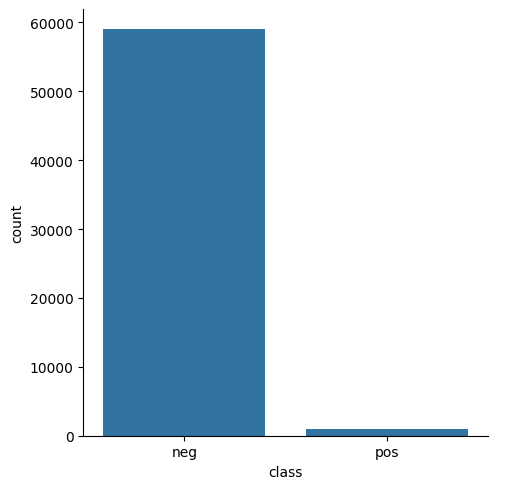

In [12]:
#visualization of unique values in target variable

sns.catplot(data=df,x='class',kind='count')

In [13]:
def evaluate_clf(y_true,y_pred):
    acc = accuracy_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    auc = roc_auc_score(y_true,y_pred)
    return acc,f1,precision,recall,auc
    

In [14]:
# compute cost of model as per description

def model_cost(y_true,y_pred):
    tn,fp,fn,tp=confusion_matrix(y_true,y_pred).ravel()
    cost = fp*10+fn*500
    return cost

In [15]:
def evaluate_model(x,y,models):
    x_train,x_test,y_train,y_test = train_test_split(x,y)
    models_list=[]
    cost_list=[]
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(x_train,y_train)
        y_train_pred = model.predict(x_train)

        #metrics on training data
        train_acc,train_f1,train_precision,train_recall,train_auc = evaluate_clf(y_train,y_train_pred)
        train_cost = model_cost(y_train,y_train_pred)

        print(f"training accuracy: {train_acc}")
        print(f"train f1: {train_f1}")
        print(f"train precision: {train_precision}")
        print(f"train reacall: {train_recall}")
        print(f"train auc: {train_auc}")
        print(f"train cost: {train_cost}")

        y_test_pred = model.predict(x_test)

        test_acc,test_f1,test_precision,test_reacll,test_auc = evaluate_clf(y_test,y_test_pred)
        test_cost = model_cost(y_test,y_test_pred)
        print(f"testing accuracy: {test_acc}")
        print(f"testing f1: {test_f1}")
        print(f"testing precision: {test_precision}")
        print(f"testing recall: {test_reacll}")
        print(f"testing auc: {test_auc}")
        print(f"testing cost: {test_cost}")
        cost_list.append(test_cost)

        models_list.append(list(models.keys())[i])

        report = pd.DataFrame(list(zip(models_list,cost_list)),columns=['model','cost']).sort_values(by=['cost'])
        
        return report



## evaluate models for different experiments

In [16]:
x = df.drop('class',axis=1)
y = df['class']

In [17]:
y = y.replace({'neg':0,'pos':1})

# experimemnt 1 knn imputer for null values

In [18]:
robust_scaler = RobustScaler()
x1 = robust_scaler.fit_transform(x)

In [21]:
knn_pipeline = Pipeline(steps=[('knn',KNNImputer(n_neighbors=7)),('scaler',RobustScaler())])

In [22]:
x_knn = knn_pipeline.fit_transform(x)

## handling imbalanced data

In [23]:
from imblearn.combine import SMOTETomek

In [24]:
smote = SMOTETomek(sampling_strategy='minority',n_jobs=-1)

x_smote, y_smote = smote.fit_resample(x_knn, y)

c:\Users\MSI\Desktop\end_to_end_scania_truck_project\env\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [25]:
models = {'random_forest':RandomForestClassifier(),
          'xgboost':XGBClassifier(),
          'adaboost':AdaBoostClassifier()}

In [26]:
report = evaluate_model(x_smote,y_smote,models)

training accuracy: 1.0
train f1: 1.0
train precision: 1.0
train reacall: 1.0
train auc: 1.0
train cost: 0
testing accuracy: 0.9935466340601862
testing f1: 0.9935628133893482
testing precision: 0.9899405887118553
testing recall: 0.9972116430903155
testing auc: 0.9935508615777267
testing cost: 21990


In [27]:
report

,model,cost
0,random_forest,21990


## experiment 2 median imputation

In [28]:
median_imputer = Pipeline(steps=[('i',SimpleImputer(strategy='median')),('s',RobustScaler())])

In [29]:
x_median = median_imputer.fit_transform(x)

In [30]:
smote = SMOTETomek(sampling_strategy='minority')
x_med,ymed = smote.fit_resample(x_median,y)

In [31]:
report = evaluate_model(x_med,ymed,models)

training accuracy: 1.0
train f1: 1.0
train precision: 1.0
train reacall: 1.0
train auc: 1.0
train cost: 0
testing accuracy: 0.9947667108437829
testing f1: 0.9948092220574356
testing precision: 0.9916672266648747
testing recall: 0.9979711909109353
testing auc: 0.994750622777872
testing cost: 16240


In [32]:
report

,model,cost
0,random_forest,16240


## mean imputation

In [33]:
mean_imputer = Pipeline(steps=[('i',SimpleImputer(strategy='mean')),('s',RobustScaler())])

In [34]:
x_mean = mean_imputer.fit_transform(x)

In [35]:
smote = SMOTETomek(sampling_strategy='minority')
x_mean,ymean = smote.fit_resample(x_mean,y)

In [36]:
report = evaluate_model(x_mean,ymean,models)

training accuracy: 1.0
train f1: 1.0
train precision: 1.0
train reacall: 1.0
train auc: 1.0
train cost: 0
testing accuracy: 0.9951767942664991
testing f1: 0.9952052944354403
testing precision: 0.9927248231727854
testing recall: 0.9976981924040349
testing auc: 0.9951681146069254
testing cost: 18080


In [37]:
report

,model,cost
0,random_forest,18080


## constant imputation

In [39]:
constant_imputer = Pipeline(steps=[('i',SimpleImputer(strategy='constant',fill_value=0)),('s',RobustScaler())])

In [40]:
x_constant = constant_imputer.fit_transform(x)

In [41]:
smote=  SMOTETomek(sampling_strategy='minority')
x_res,y_res = smote.fit_resample(x_constant,y)

In [42]:
report = evaluate_model(x_res,y_res,models)

training accuracy: 1.0
train f1: 1.0
train precision: 1.0
train reacall: 1.0
train auc: 1.0
train cost: 0
testing accuracy: 0.9949031600407747
testing f1: 0.9949409780775715
testing precision: 0.9916633050961409
testing recall: 0.9982403898213319
testing auc: 0.9948892682012351
testing cost: 14240


In [43]:
report

,model,cost
0,random_forest,14240


In [44]:
from prettytable import PrettyTable

In [45]:
pt = PrettyTable()
pt.field_names=['model','imputer','cost']
pt.add_row(['random_forest','constant','14240'])
pt.add_row(['random_forest','median','16240'])
pt.add_row(['random_forest','mean','18080'])
pt.add_row(['random_forest','knn','21990'])

In [46]:
print(pt)

+---------------+----------+-------+
|     model     | imputer  |  cost |
+---------------+----------+-------+
| random_forest | constant | 14240 |
| random_forest |  median  | 16240 |
| random_forest |   mean   | 18080 |
| random_forest |   knn    | 21990 |
+---------------+----------+-------+


In [47]:
final_model = RandomForestClassifier()
imputer = Pipeline(steps=[('i',SimpleImputer(strategy='constant',fill_value=0)),('s',RobustScaler())])


In [48]:
x = imputer.fit_transform(x)

In [49]:
smote = SMOTETomek(sampling_strategy='minority')
x_res,y_res = smote.fit_resample(x,y)

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res)

In [51]:
final_model = final_model.fit(x_train,y_train)

In [52]:
y_pred = final_model.predict(x_test)

In [53]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[14559   157]
 [   28 14680]]


In [54]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9937126155519304
